# 花品种分类问题-逻辑回归

在这一次练习中,我们将要实现逻辑回归并且应用到一个分类问题，我们将把正则化方法加入训练算法中，增强算法的鲁棒性，并通过更复杂的情形来测试它

# 逻辑回归

   在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个采集样本属于0类，1类（0 代表山鸢尾1 代表变色鸢尾）。设想你是采集员，想通过花瓣宽度和花瓣长度来决定它是0类还是1类。
现在你拥有一些样本的数据，可作为逻辑回归的训练集。对于每一个训练样本，你拥有包括花瓣宽度花瓣长度以及所属类别的信息。为了完成这个预测任务，我们准备构建一个可以基于花瓣宽度和花瓣长度来评估所属类别可能性的分类模型

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [235]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [237]:
iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df['target'] = iris_dataset.target
mask=df['target']!=2
df=df[mask]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [228]:
df.shape

(100, 5)

In [229]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


定义训练集和测试集

In [240]:
X = df[['petal length (cm)', 'petal width (cm)']]  # 特征数据
y = df[['target']] # 目标标签
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
X_train= pd.concat([X_train, y_train],axis=1)
X_test= pd.concat([X_test, y_test],axis=1)

,petal length (cm),petal width (cm),target
26,1.6,0.4,0
86,4.7,1.5,1
2,1.3,0.2,0
55,4.5,1.3,1
75,4.4,1.4,1
93,3.3,1.0,1
16,1.3,0.4,0
73,4.7,1.2,1
54,4.6,1.5,1
95,4.2,1.2,1


让我们创建两品种的散点图，并使用不同颜色来标识

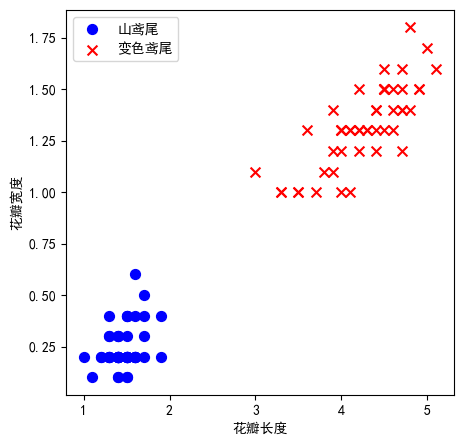

In [241]:
type0=df[df['target'].isin([0])]
type1=df[df['target'].isin([1])]
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(type0['petal length (cm)'],
          type0['petal width (cm)'],
          s=50,
          c='b',
          marker='o',
          label='山鸢尾')
ax.scatter(type1['petal length (cm)'],
          type1['petal width (cm)'],
          s=50,
          c='r',
          marker='x',
          label='变色鸢尾')
ax.legend()
ax.set_xlabel('花瓣长度')
ax.set_ylabel('花瓣宽度')
plt.show()

看起来两类之间确实有一个清晰的决策边界，所以可以用逻辑回归来进行模型构建

# Sigmoid函数

In [242]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

让我们画出它的图形

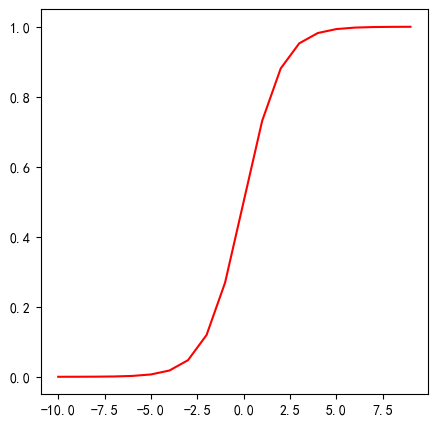

In [245]:
nums=np.arange(-10,10,step=1)
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(nums,sigmoid(nums),'r')
plt.show()